In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import outils_data

In [59]:
df = pd.read_csv('Loan Data.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
398,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural,Y
239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
448,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N


---
**Identification des variables catégorielles et numériques**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
numeric_columns.remove('Credit_History')
numeric_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [62]:
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
categorical_columns.append('Credit_History')
categorical_columns.remove('Loan_ID')
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

---
Description du dataframe, identification des valeurs nulles

In [63]:
df.shape

(614, 13)

In [64]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [65]:
df.describe(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [66]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

---
Analyses univariées

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


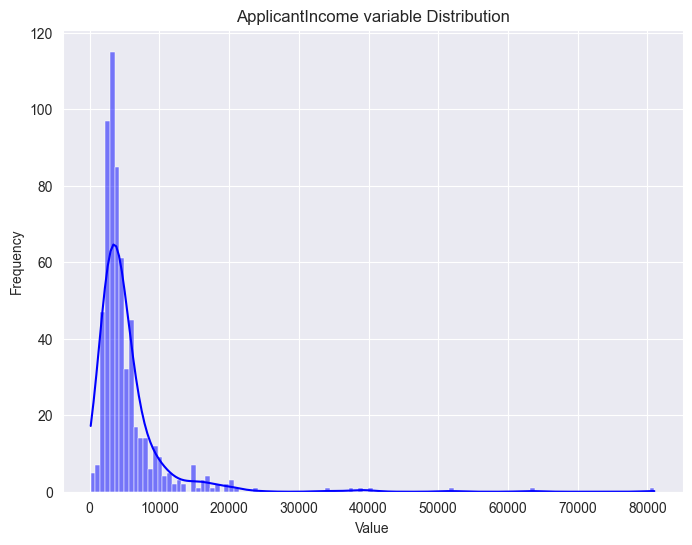

La variable ApplicantIncome ne suit pas une distribution normale.
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


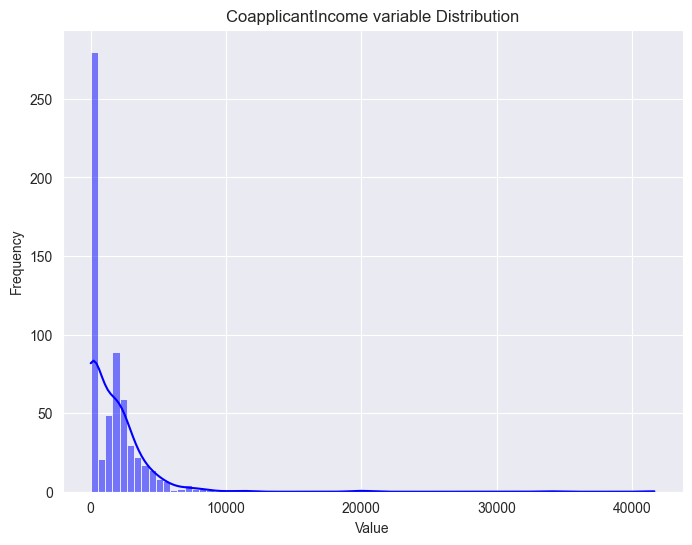

La variable CoapplicantIncome ne suit pas une distribution normale.
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


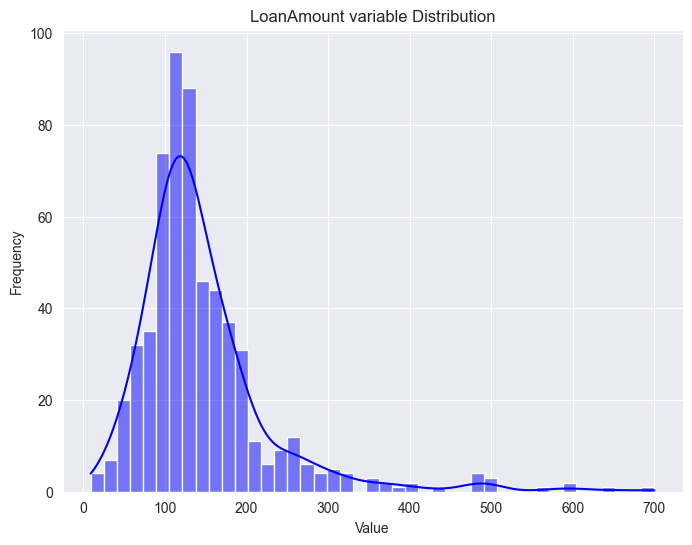

La variable LoanAmount suit une distribution normale.
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


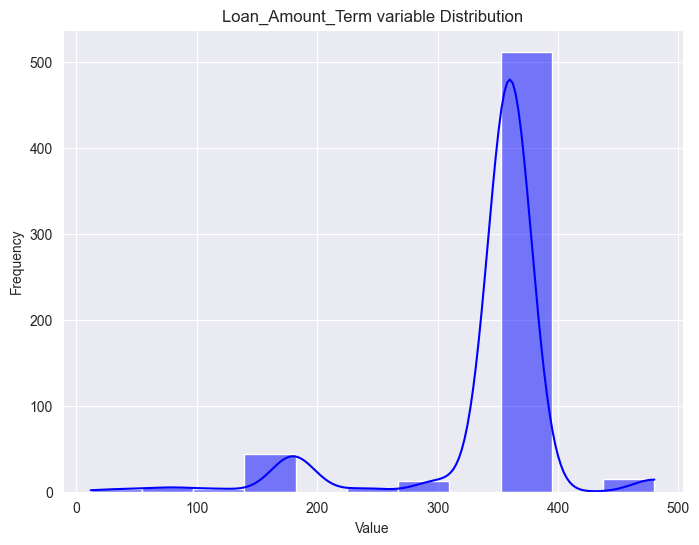

La variable Loan_Amount_Term suit une distribution normale.


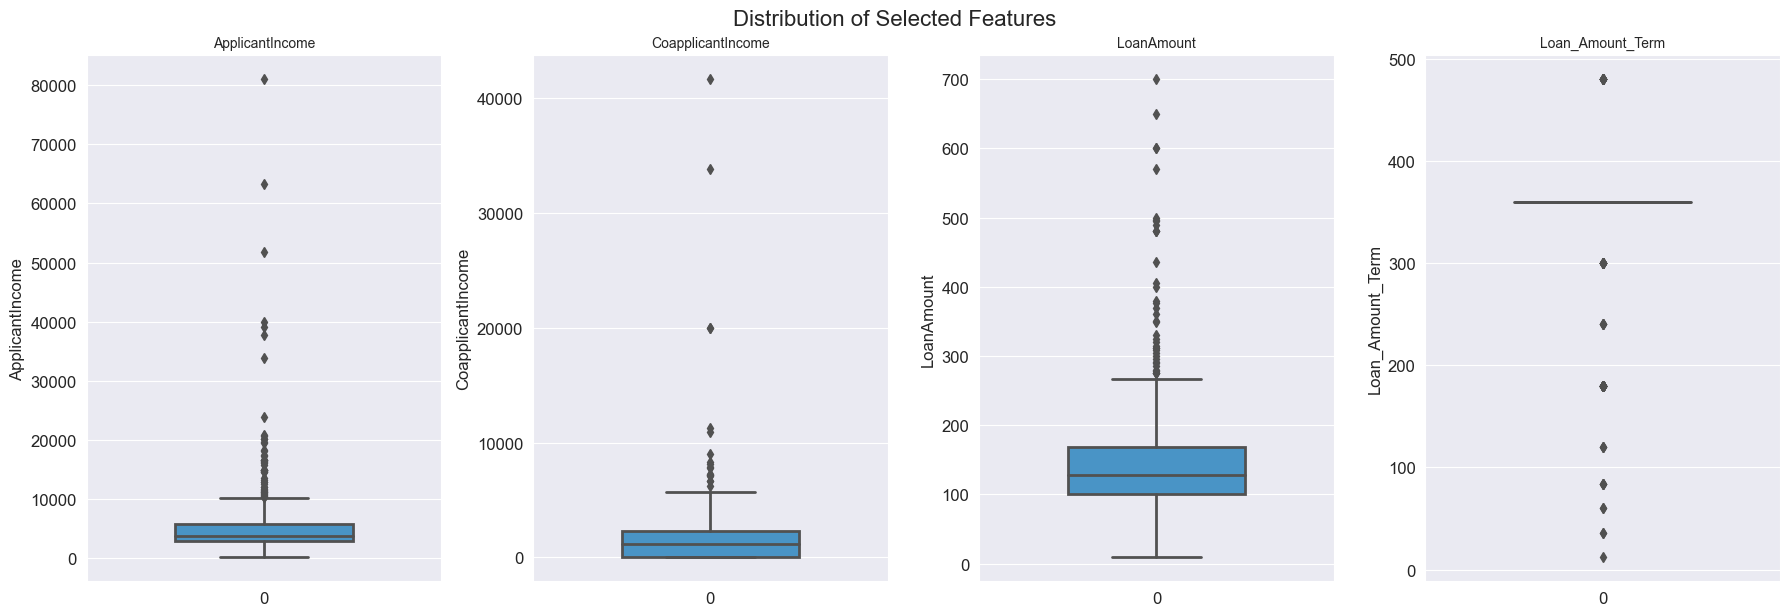

In [67]:
for column in numeric_columns:
    outils_data.distribution_curve(df, column)
    
    if (outils_data.normal_distribution(df, column, 0.05)) :
        print(f"La variable {column} suit une distribution normale.")
    else:
        print(f"La variable {column} ne suit pas une distribution normale.")

outils_data.draw_boxplots(numeric_columns, df)

In [68]:
for column in categorical_columns :
    print(f"{column} : {df[column].unique()}")

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']
Credit_History : [ 1.  0. nan]


In [69]:
df_inconnu = df.copy()
for column in categorical_columns :
    df_inconnu[column] = df_inconnu[column].fillna("Inconnu")
    
# Calculer les pourcentages d'occurrence
for column in categorical_columns :
    print("\n")
    pourcentages = df_inconnu[column].value_counts(normalize=True) * 100
    pourcentages = pourcentages.round(2)
    print(pourcentages)



Gender
Male       79.64
Female     18.24
Inconnu     2.12
Name: proportion, dtype: float64


Married
Yes        64.82
No         34.69
Inconnu     0.49
Name: proportion, dtype: float64


Dependents
0          56.19
1          16.61
2          16.45
3+          8.31
Inconnu     2.44
Name: proportion, dtype: float64


Education
Graduate        78.18
Not Graduate    21.82
Name: proportion, dtype: float64


Self_Employed
No         81.43
Yes        13.36
Inconnu     5.21
Name: proportion, dtype: float64


Property_Area
Semiurban    37.95
Urban        32.90
Rural        29.15
Name: proportion, dtype: float64


Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


Credit_History
1.0        77.36
0.0        14.50
Inconnu     8.14
Name: proportion, dtype: float64


In [70]:
# Remplacement des valeurs NaN par le mode
df_na_filled = df.copy()
for column in categorical_columns :
    column_mode = df[column].mode()[0]
    df_na_filled[column] = df_na_filled[column].fillna(column_mode)

In [71]:
for column in categorical_columns :
    print("\n")
    print(df_na_filled[column].value_counts())



Gender
Male      502
Female    112
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     532
Yes     82
Name: count, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


Loan_Status
Y    422
N    192
Name: count, dtype: int64


Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


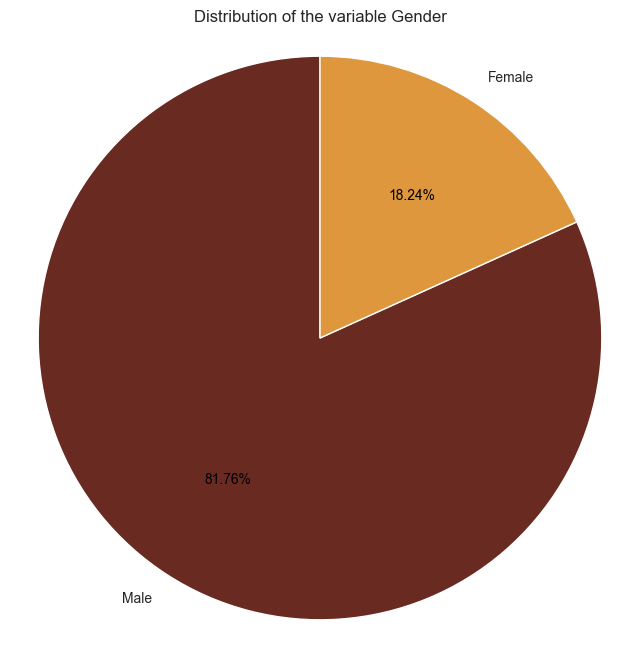

In [72]:
outils_data.draw_pieplot(df_na_filled,'Gender')

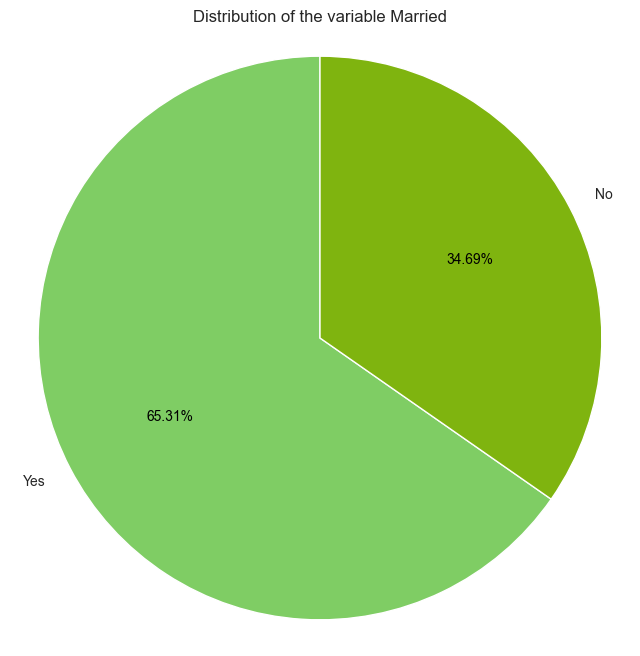

In [73]:
outils_data.draw_pieplot(df_na_filled,'Married')

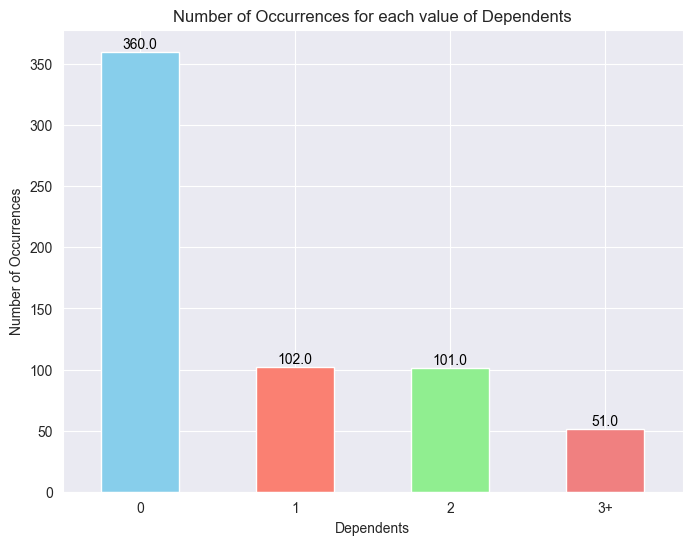

In [74]:
outils_data.draw_barplot(df_na_filled,'Dependents')

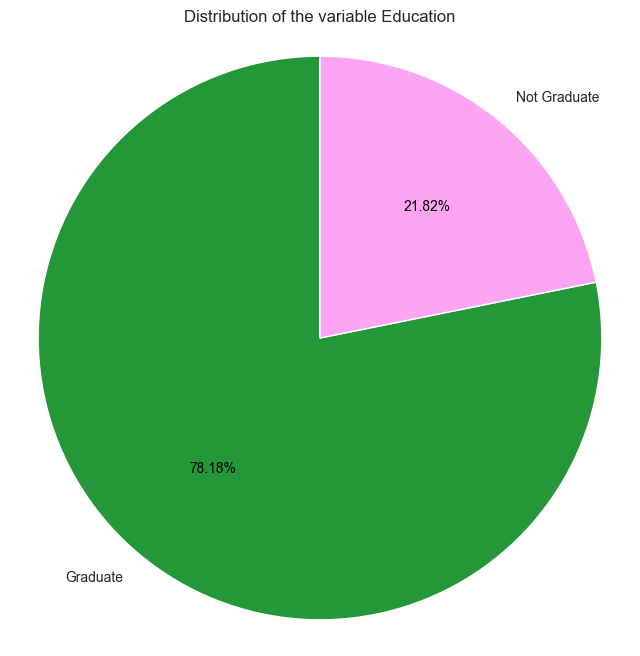

In [75]:
outils_data.draw_pieplot(df_na_filled,'Education')

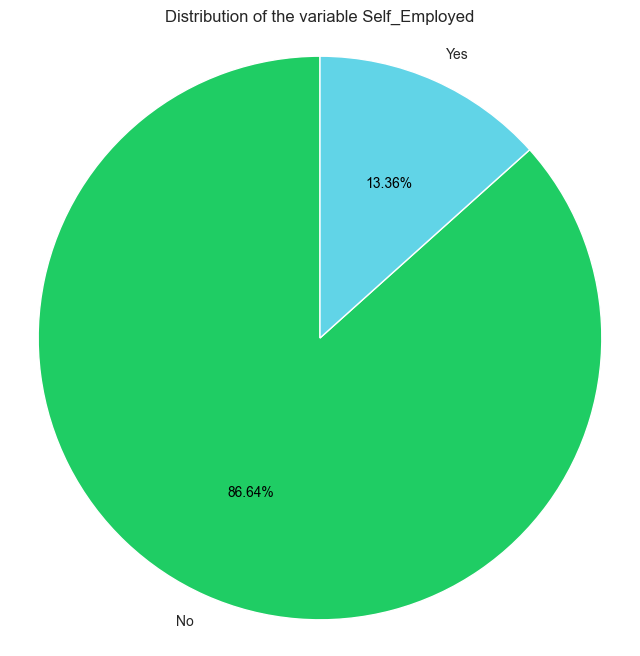

In [76]:
outils_data.draw_pieplot(df_na_filled,'Self_Employed')

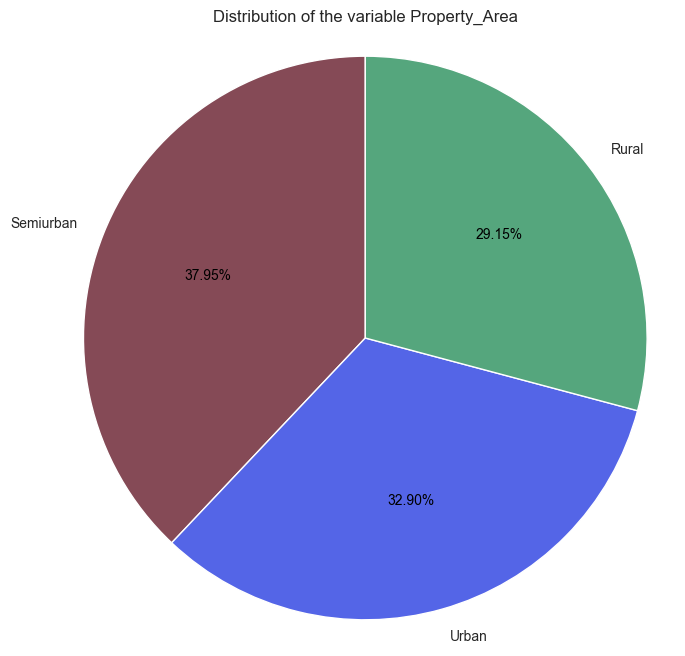

In [77]:
outils_data.draw_pieplot(df_na_filled,'Property_Area')

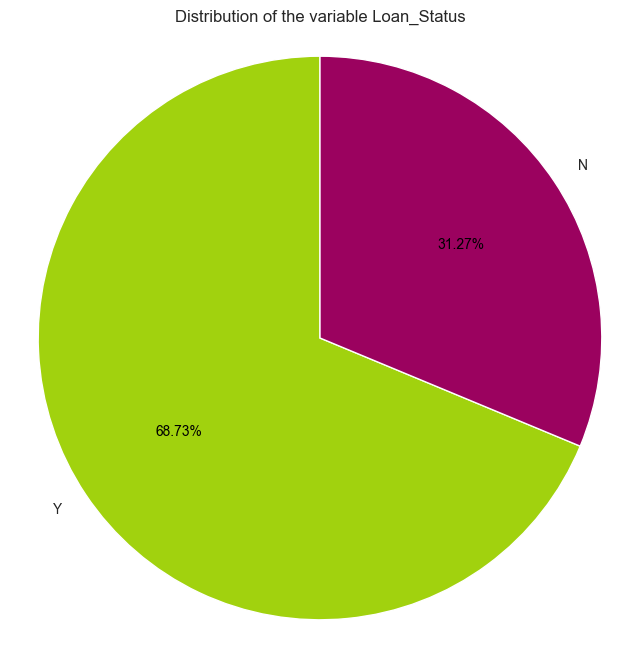

In [78]:
outils_data.draw_pieplot(df_na_filled,'Loan_Status')

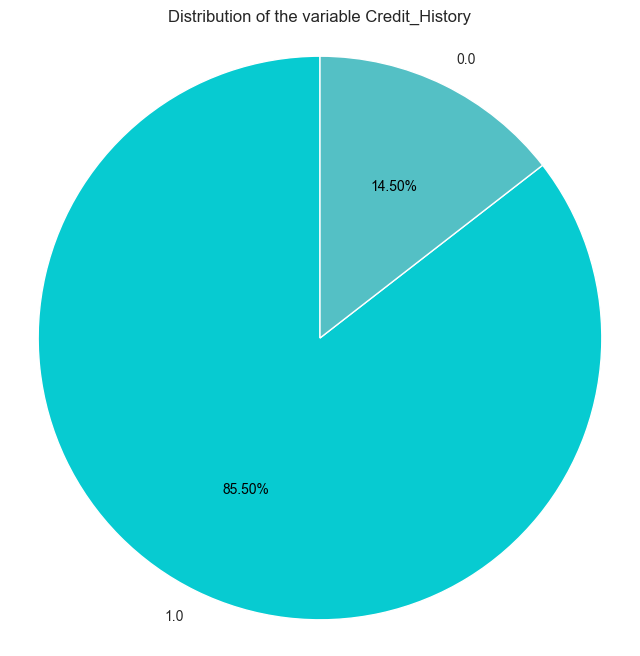

In [79]:
outils_data.draw_pieplot(df_na_filled,'Credit_History')

---
**Analyses bivariées**

In [80]:
df_corr = df[numeric_columns]
correl = df_corr.corr()
correl.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


<Axes: >

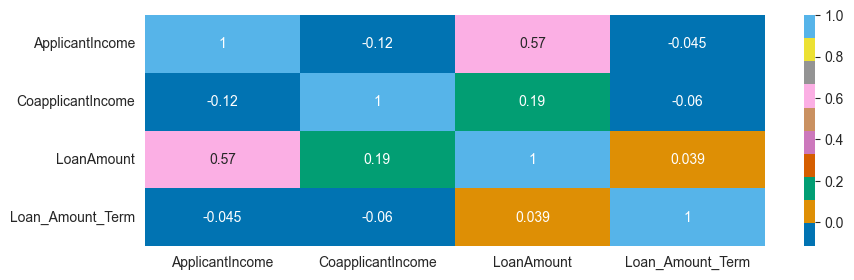

In [81]:
plt.figure(figsize=(10, 3))
sns.heatmap(df_corr.corr(), fmt='.2g', annot=True, cmap=sns.color_palette("colorblind"))

In [82]:
outils_data.chi_squared_tests(df_na_filled, categorical_columns)

Test du χ² entre Gender et Married:
Statistique de test du χ² : 79.63562874824729
Valeur de p : 4.502328957824834e-19
Degrés de liberté : 1
Fréquences attendues :
[[ 38.8534202  73.1465798]
 [174.1465798 327.8534202]]


Test du χ² entre Gender et Dependents:
Statistique de test du χ² : 19.49201865207906
Valeur de p : 0.00021627443011424633
Degrés de liberté : 3
Fréquences attendues :
[[ 65.66775244  18.60586319  18.42345277   9.3029316 ]
 [294.33224756  83.39413681  82.57654723  41.6970684 ]]


Test du χ² entre Gender et Education:
Statistique de test du χ² : 0.9951537284364683
Valeur de p : 0.31848601211356387
Degrés de liberté : 1
Fréquences attendues :
[[ 87.55700326  24.44299674]
 [392.44299674 109.55700326]]


Test du χ² entre Gender et Self_Employed:
Statistique de test du χ² : 0.0
Valeur de p : 1.0
Degrés de liberté : 1
Fréquences attendues :
[[ 97.04234528  14.95765472]
 [434.95765472  67.04234528]]


Test du χ² entre Gender et Property_Area:
Statistique de test du χ² : 7.79037

In [83]:
from tabulate import tabulate

In [84]:
from tabulate import tabulate

# Créer un DataFrame avec vos résultats
data = {
    "Test": ["Gender vs Married", "Gender vs Dependents", "Gender vs Education", "Gender vs Self_Employed",
             "Gender vs Property_Area", "Gender vs Loan_Status", "Gender vs Credit_History",
             "Married vs Dependents", "Married vs Education", "Married vs Self_Employed",
             "Married vs Property_Area", "Married vs Loan_Status", "Married vs Credit_History",
             "Dependents vs Education", "Dependents vs Self_Employed", "Dependents vs Property_Area",
             "Dependents vs Loan_Status", "Dependents vs Credit_History", "Education vs Self_Employed",
             "Education vs Property_Area", "Education vs Loan_Status", "Education vs Credit_History",
             "Self_Employed vs Property_Area", "Self_Employed vs Loan_Status", "Self_Employed vs Credit_History",
             "Property_Area vs Loan_Status", "Property_Area vs Credit_History", "Loan_Status vs Credit_History"],
    "Statistique de test du χ²": [79.64, 19.49, 0.99, 0.00, 7.79, 0.11, 0.01, 79.27, 0.04, 0.0, 0.03, 4.73, 0.02, 
                                  2.37, 5.97, 6.54, 3.15, 2.25, 0.01, 3.69, 4.09, 2.84, 0.62, 0.0, 0.0, 12.30, 0.80, 176.11],
    "Valeur de p": [4.502e-19, 2.162e-04, 0.318, 1.00, 0.020, 0.739, 0.937, 4.404e-17, 0.840, 1.00, 0.983, 0.030, 0.880, 
                    0.498, 0.113, 0.365, 0.369, 0.523, 0.909, 0.158, 0.043, 0.092, 0.733, 1.00, 1.00, 0.002, 0.670, 3.418e-40]
}

df_khi_deux = pd.DataFrame(data)

# Ajouter une colonne pour l'interprétation
df_khi_deux["Interprétation"] = ["Corrélation significative" if p < 0.05 else "Pas de corrélation" for p in df_khi_deux["Valeur de p"]]

# Sélectionner les corrélations significatives
significatives = df_khi_deux[df_khi_deux["Interprétation"] == "Corrélation significative"]

# Utiliser tabulate pour afficher le tableau avec des couleurs
table = tabulate(df_khi_deux, headers='keys', tablefmt='fancy_grid', showindex=False, stralign="center", numalign="center")

print(significatives)

                             Test  Statistique de test du χ²   Valeur de p  \
0               Gender vs Married                      79.64  4.502000e-19   
1            Gender vs Dependents                      19.49  2.162000e-04   
4         Gender vs Property_Area                       7.79  2.000000e-02   
7           Married vs Dependents                      79.27  4.404000e-17   
11         Married vs Loan_Status                       4.73  3.000000e-02   
20       Education vs Loan_Status                       4.09  4.300000e-02   
25   Property_Area vs Loan_Status                      12.30  2.000000e-03   
27  Loan_Status vs Credit_History                     176.11  3.418000e-40   

               Interprétation  
0   Corrélation significative  
1   Corrélation significative  
4   Corrélation significative  
7   Corrélation significative  
11  Corrélation significative  
20  Corrélation significative  
25  Corrélation significative  
27  Corrélation significative  


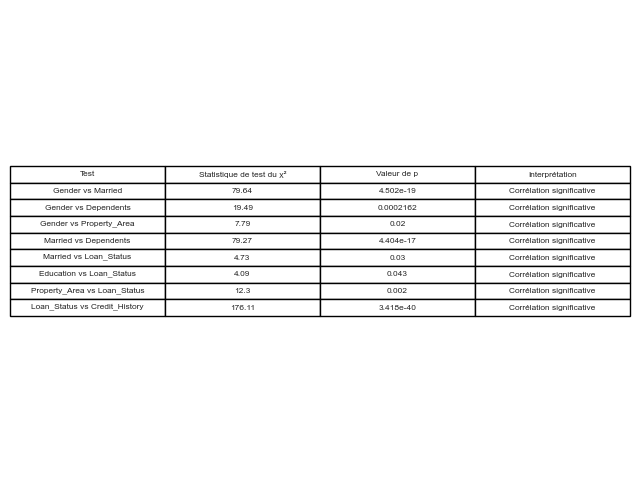

In [85]:
# Générer une image du tableau
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.table(cellText=significatives.values, colLabels=significatives.columns, cellLoc='center', loc='center')

# Afficher le tableau
plt.savefig('correlations.png')

Remplaçons les valeurs nulles par la médiane pour les colonnes LoanAmount et Loan_Amount_Term

In [86]:
med_loan_amount = df_na_filled['LoanAmount'].median()
df_na_filled['LoanAmount'] = df_na_filled['LoanAmount'].fillna(med_loan_amount)

In [87]:
med_loan_amount_term = df_na_filled['Loan_Amount_Term'].median()
df_na_filled['Loan_Amount_Term'] = df_na_filled['Loan_Amount_Term'].fillna(med_loan_amount_term)

Pour chacune des colonnes numériques, on va essayer de voir le nombre d'outliers en utilisant les fonctions du module outils_data

In [88]:
df_to_use = df_na_filled.copy()

# Nous choisissons trois méthodes et nous imposons un seuil de 2 pour que ce soit un outlier
df_with_outliers = outils_data.dataframe_outliers(df_to_use, numeric_columns, outils_data.iqr, outils_data.zscore, cont=0.02)

for column in numeric_columns :
    df_outliers = outils_data.outliers_by_column(df_with_outliers, column, threshold=2)
    med = df_to_use[column].median()
    if df_to_use[column].dtype == 'int64' :
        med = int(med)
        
    for index, row in df_outliers.iterrows() :
        loan_id = row['Loan_ID']
        df_to_use.loc[df_to_use['Loan_ID']==loan_id, column] = med

In [89]:
# Remplacer les lignes à 0 au niveau de la colonne CoapplicantIncome par la médiane
med = df_to_use['CoapplicantIncome'].median()
df_to_use['CoapplicantIncome'].replace(0, med, inplace=True)

**Mise en oeuvre des algorithmes**

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [91]:
df_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
# Encodage avec le One-Hot Encoding pour Property Area
df_to_use = pd.get_dummies(df_to_use, columns=["Property_Area"])
df_to_use.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
377,LP002223,Male,Yes,0,Graduate,No,4310,1177.75,130.0,360.0,1.0,Y,False,True,False
51,LP001157,Female,No,0,Graduate,No,3086,1177.75,120.0,360.0,1.0,Y,False,True,False
459,LP002473,Male,Yes,0,Graduate,No,8334,1177.75,160.0,360.0,1.0,N,False,True,False
589,LP002926,Male,Yes,2,Graduate,Yes,2726,1177.75,106.0,360.0,0.0,N,False,True,False
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.00,121.0,360.0,0.0,N,False,True,False
357,LP002151,Male,Yes,1,Graduate,No,3875,1177.75,67.0,360.0,1.0,N,False,False,True
360,LP002161,Female,No,1,Graduate,No,4723,1177.75,81.0,360.0,1.0,N,False,True,False
116,LP001404,Female,Yes,0,Graduate,No,3167,2283.00,154.0,360.0,1.0,Y,False,True,False
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,1177.75,96.0,360.0,1.0,Y,False,False,True
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.00,131.0,360.0,1.0,Y,False,True,False


In [93]:
# Changer manuellement les autres types de colonnes
df_to_use.loc[df_to_use['Dependents']=='3+', 'Dependents'] = 3
df_to_use['Dependents'] = df_to_use['Dependents'].astype(int)

# df_to_use.loc[df_to_use['Gender']=='Male', 'Gender'] = 0
# df_to_use.loc[df_to_use['Gender']=='Female', 'Gender'] = 1
# df_to_use['Gender'] = df_to_use['Gender'].astype(int)

df_to_use.loc[df_to_use['Married']=='No', 'Married'] = 0
df_to_use.loc[df_to_use['Married']=='Yes', 'Married'] = 1
df_to_use['Married'] = df_to_use['Married'].astype(int)

df_to_use.loc[df_to_use['Self_Employed']=='No', 'Self_Employed'] = 0
df_to_use.loc[df_to_use['Self_Employed']=='Yes', 'Self_Employed'] = 1
df_to_use['Self_Employed'] = df_to_use['Self_Employed'].astype(int)

df_to_use.loc[df_to_use['Education']=='Not Graduate', 'Education'] = 0
df_to_use.loc[df_to_use['Education']=='Graduate', 'Education'] = 1
df_to_use['Education'] = df_to_use['Education'].astype(int)

df_to_use.loc[df_to_use['Loan_Status']=='N', 'Loan_Status'] = 0
df_to_use.loc[df_to_use['Loan_Status']=='Y', 'Loan_Status'] = 1
df_to_use['Loan_Status'] = df_to_use['Loan_Status'].astype(int)

df_to_use['Credit_History'] = df_to_use['Credit_History'].astype(int)

df_to_use.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
504,LP002619,Male,1,0,0,0,3814,1483.00,124.0,300.0,1,1,False,True,False
274,LP001896,Male,1,2,1,0,3900,1177.75,90.0,360.0,1,1,False,True,False
104,LP001357,Male,1,0,1,0,3816,754.00,160.0,360.0,1,1,False,False,True
227,LP001758,Male,1,2,1,0,6250,1695.00,210.0,360.0,1,1,False,True,False
290,LP001936,Male,1,0,1,0,3075,2416.00,139.0,360.0,1,1,True,False,False
455,LP002455,Male,1,2,1,0,3859,1177.75,96.0,360.0,1,1,False,True,False
354,LP002143,Female,1,0,1,0,2423,505.00,130.0,360.0,1,1,False,True,False
71,LP001245,Male,1,2,0,1,1875,1875.00,97.0,360.0,1,1,False,True,False
499,LP002602,Male,0,0,1,0,6283,4416.00,209.0,360.0,0,0,True,False,False
359,LP002160,Male,1,3,1,0,5167,3167.00,200.0,360.0,1,1,False,True,False


In [94]:
# Division des données en features et target
X = df_to_use.drop(["Loan_ID", "Gender", "Loan_Status"], axis=1).values
y = df_to_use["Loan_Status"].values

In [95]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Faire de l'oversampling pour rééquilibrer les classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

*Régression logistique*

In [97]:
# Entraînement du modèle
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)

C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
# Prédiction et évaluation
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.7398373983739838
Classification report : 
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        43
           1       0.78      0.84      0.81        80

    accuracy                           0.74       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.73      0.74      0.73       123


---
*Random forest*

In [99]:
# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [100]:
# Prédiction et évaluation
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.7723577235772358
Classification report : 
              precision    recall  f1-score   support

           0       0.78      0.49      0.60        43
           1       0.77      0.93      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.72       123
weighted avg       0.77      0.77      0.76       123


---
*Algorithme des K Plus Proches Voisins (KNN)*

In [101]:
# Première expérimentation avec k=5
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [102]:
# Prédiction et évaluation
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.4959349593495935
Classification report : 
              precision    recall  f1-score   support

           0       0.31      0.37      0.34        43
           1       0.62      0.56      0.59        80

    accuracy                           0.50       123
   macro avg       0.47      0.47      0.47       123
weighted avg       0.52      0.50      0.50       123


In [103]:
# Première expérimentation avec k=3
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [104]:
# Prédiction et évaluation
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5609756097560976
Classification report : 
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        43
           1       0.67      0.65      0.66        80

    accuracy                           0.56       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.57      0.56      0.56       123


In [105]:
# Première expérimentation avec k=7
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=7)

In [106]:
# Prédiction et évaluation
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5365853658536586
Classification report : 
              precision    recall  f1-score   support

           0       0.34      0.35      0.34        43
           1       0.65      0.64      0.64        80

    accuracy                           0.54       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.54      0.54      0.54       123


---
*Support Vector Machines*

In [107]:
# Initialisation et entraînement du modèle (linéaire)
svm_model = SVC(kernel='linear')
svm_model.fit(X_resampled, y_resampled)

SVC(kernel='linear')

In [108]:
# Prédiction et évaluation
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.6829268292682927
Classification report : 
              precision    recall  f1-score   support

           0       0.54      0.60      0.57        43
           1       0.77      0.72      0.75        80

    accuracy                           0.68       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.69      0.68      0.69       123


In [109]:
# Initialisation et entraînement du modèle (sigmoid)
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_resampled, y_resampled)

SVC(kernel='sigmoid')

In [110]:
# Prédiction et évaluation
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5691056910569106
Classification report : 
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        43
           1       0.68      0.64      0.66        80

    accuracy                           0.57       123
   macro avg       0.54      0.54      0.54       123
weighted avg       0.58      0.57      0.57       123


In [111]:
# Initialisation et entraînement du modèle (polynomial)
svm_model = SVC(kernel='poly')
svm_model.fit(X_resampled, y_resampled)

SVC(kernel='poly')

In [112]:
# Prédiction et évaluation
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.3170731707317073
Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.91      0.48        43
           1       0.00      0.00      0.00        80

    accuracy                           0.32       123
   macro avg       0.16      0.45      0.24       123
weighted avg       0.11      0.32      0.17       123


---
*Algorithme de Bayes*

In [121]:
# Initialisation et entraînement du modèle
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)

GaussianNB()

In [122]:
# Prédiction et évaluation
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.7642276422764228
Classification report : 
              precision    recall  f1-score   support

         0.0       0.82      0.42      0.55        43
         1.0       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123
